In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Dataset Preview:
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...      

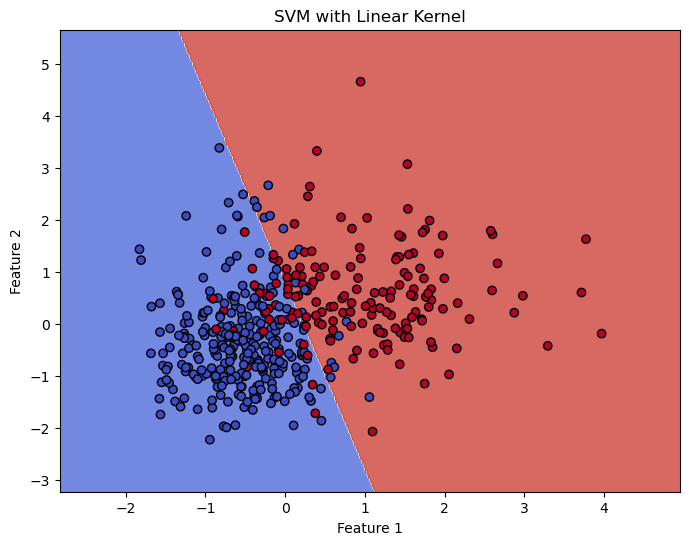

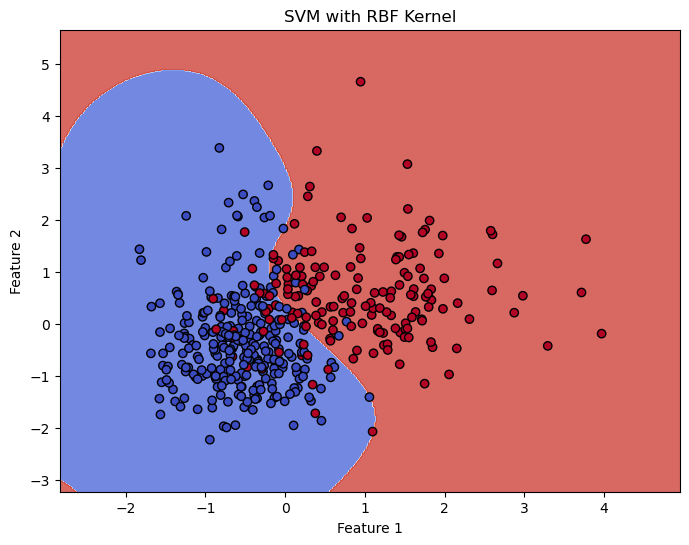


✅ Best Hyperparameters (RBF): {'C': 10, 'gamma': 0.1}
🔁 Best Cross-validation Score: 0.9010989010989011

📈 Cross-validation scores: [0.93406593 0.97802198 0.97802198 0.96703297 0.92307692]
📊 Average CV Score: 0.956043956043956


In [12]:
# 📦 Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 📥 Load dataset
data = pd.read_csv("breast-cancer.csv")  # Change path if running locally

# 🧹 Clean dataset
cols_to_drop = ['Unnamed: 32', 'id']
data = data.drop(columns=[col for col in cols_to_drop if col in data.columns])

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# 🧾 Preview data
print("Dataset Preview:\n", data.head())
print("\nClass Distribution:\n", data['diagnosis'].value_counts())

# 🎯 Split features and labels
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# 🔍 Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 👁️ For visualization (use first two features only)
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# ⚙️ Train Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_vis, y_train_vis)
print("\n🔎 Linear Kernel SVM Performance:\n", classification_report(y_test_vis, svm_linear.predict(X_test_vis)))

# ⚙️ Train RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_vis, y_train_vis)
print("\n🔎 RBF Kernel SVM Performance:\n", classification_report(y_test_vis, svm_rbf.predict(X_test_vis)))

# 🖼️ Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 📊 Plot decision boundaries
plot_decision_boundary(svm_linear, X_train_vis, y_train_vis, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train_vis, y_train_vis, "SVM with RBF Kernel")

# 🔍 Hyperparameter Tuning for RBF Kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train_vis, y_train_vis)
print("\n✅ Best Hyperparameters (RBF):", grid_search.best_params_)
print("🔁 Best Cross-validation Score:", grid_search.best_score_)

# 🧪 Cross-validation with full feature set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

best_model = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
cv_scores = cross_val_score(best_model, X_train_full, y_train_full, cv=5)

print("\n📈 Cross-validation scores:", cv_scores)
print("📊 Average CV Score:", np.mean(cv_scores))


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Classification Metrics Comparison:

  Class Linear Precision Linear Recall Linear F1-Score Linear Support  \
0     0             0.95          0.99            0.97          71.00   
1     1             0.97          0.91            0.94          43.00   

  RBF Precision RBF Recall RBF F1-Score RBF Support  
0          0.62       1.00         0.77       71.00  
1          0.00       0.00         0.00       43.00  


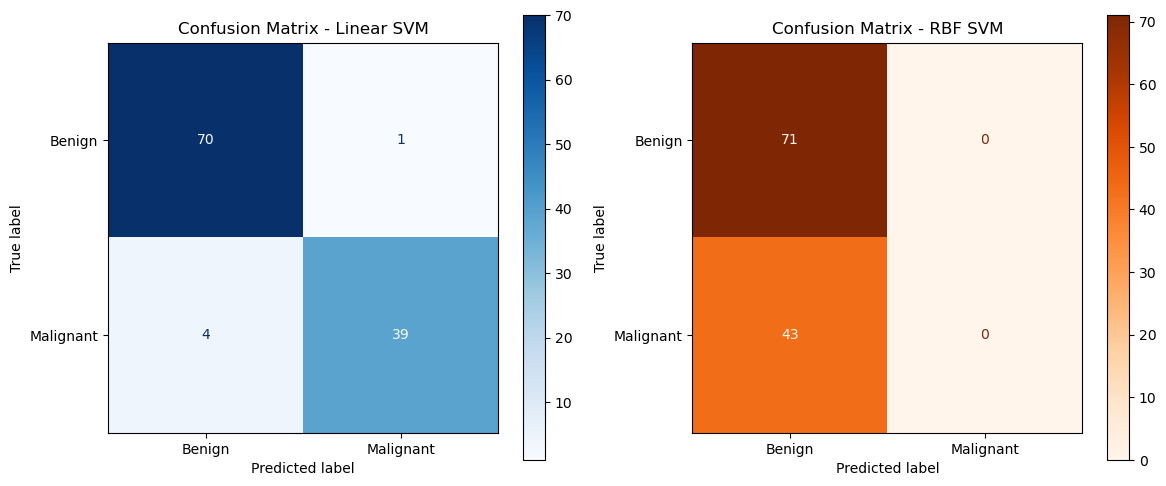

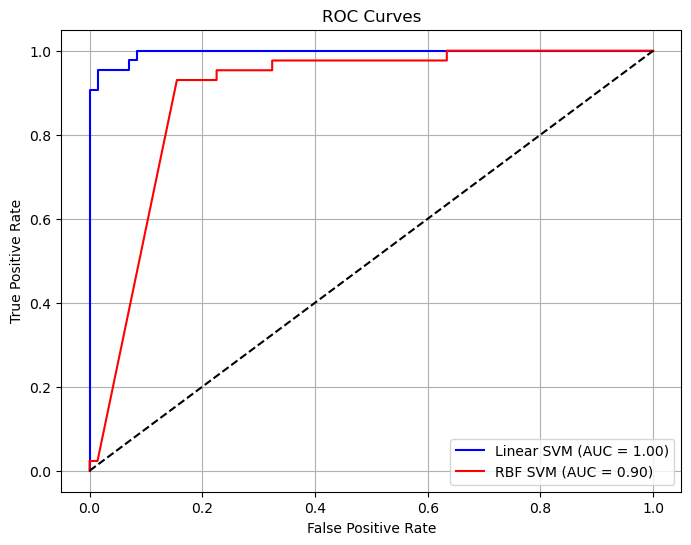

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split

# Assuming your dataset is already loaded and preprocessed as X, y

# Split dataset (use your previous split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear SVM
svm_linear = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_prob_linear = svm_linear.predict_proba(X_test)[:, 1]

# Train RBF SVM (using your best tuned parameters)
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.1, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
y_prob_rbf = svm_rbf.predict_proba(X_test)[:, 1]

# Generate classification reports
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
report_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)

# Prepare metrics comparison table
metrics = ['precision', 'recall', 'f1-score', 'support']
classes = ['0', '1']  # Benign, Malignant
table_data = []

for cls in classes:
    row = [cls]
    for metric in metrics:
        row.append(f"{report_linear[cls][metric]:.2f}")
    for metric in metrics:
        row.append(f"{report_rbf[cls][metric]:.2f}")
    table_data.append(row)

# Create DataFrame
columns = ['Class', 
           'Linear Precision', 'Linear Recall', 'Linear F1-Score', 'Linear Support',
           'RBF Precision', 'RBF Recall', 'RBF F1-Score', 'RBF Support']
df_metrics = pd.DataFrame(table_data, columns=columns)
print("📊 Classification Metrics Comparison:\n")
print(df_metrics)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=['Benign', 'Malignant'])
disp_linear.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix - Linear SVM')

disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=['Benign', 'Malignant'])
disp_rbf.plot(ax=axes[1], cmap=plt.cm.Oranges)
axes[1].set_title('Confusion Matrix - RBF SVM')

plt.tight_layout()
plt.show()

# Plot ROC curves
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_prob_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', label=f'Linear SVM (AUC = {roc_auc_linear:.2f})')
plt.plot(fpr_rbf, tpr_rbf, color='red', label=f'RBF SVM (AUC = {roc_auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('breast-cancer.csv')  # Make sure the path is correct
print("Columns in dataset:\n", data.columns)

# Drop unnecessary columns if present
columns_to_drop = [col for col in ['Unnamed: 32', 'id'] if col in data.columns]
data = data.drop(columns=columns_to_drop)

# Map diagnosis to binary
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Feature matrix and target vector
X = data.drop(columns='diagnosis')
y = data['diagnosis']

print(f"\nDataset shape: {data.shape}")
print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")


Columns in dataset:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Dataset shape: (569, 31)
Features shape: (569, 30)
Target distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [15]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 455, Testing samples: 114


In [17]:
# Train Linear SVM
svm_linear = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_prob_linear = svm_linear.predict_proba(X_test)[:, 1]

print("Linear Kernel SVM Performance:")
print(classification_report(y_test, y_pred_linear))

# Train RBF SVM with default hyperparameters first
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
y_prob_rbf = svm_rbf.predict_proba(X_test)[:, 1]

print("RBF Kernel SVM Performance:")
print(classification_report(y_test, y_pred_rbf))


Linear Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

RBF Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, cv=5, verbose=0)
grid.fit(X_train, y_train)

print(f"Best Hyperparameters (RBF): {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_:.4f}")

# Use best estimator to predict
best_rbf = grid.best_estimator_
y_pred_best_rbf = best_rbf.predict(X_test)
y_prob_best_rbf = best_rbf.predict_proba(X_test)[:, 1]

print("Tuned RBF Kernel SVM Performance:")
print(classification_report(y_test, y_pred_best_rbf))


Best Hyperparameters (RBF): {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-validation Score: 0.9758
Tuned RBF Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Classification Metrics Comparison:

  Class Linear Precision Linear Recall Linear F1-Score Linear Support  \
0     0             0.95          1.00            0.97          72.00   
1     1             1.00          0.90            0.95          42.00   

  RBF Precision RBF Recall RBF F1-Score RBF Support  
0          0.96       0.97         0.97       72.00  
1          0.95       0.93         0.94       42.00  


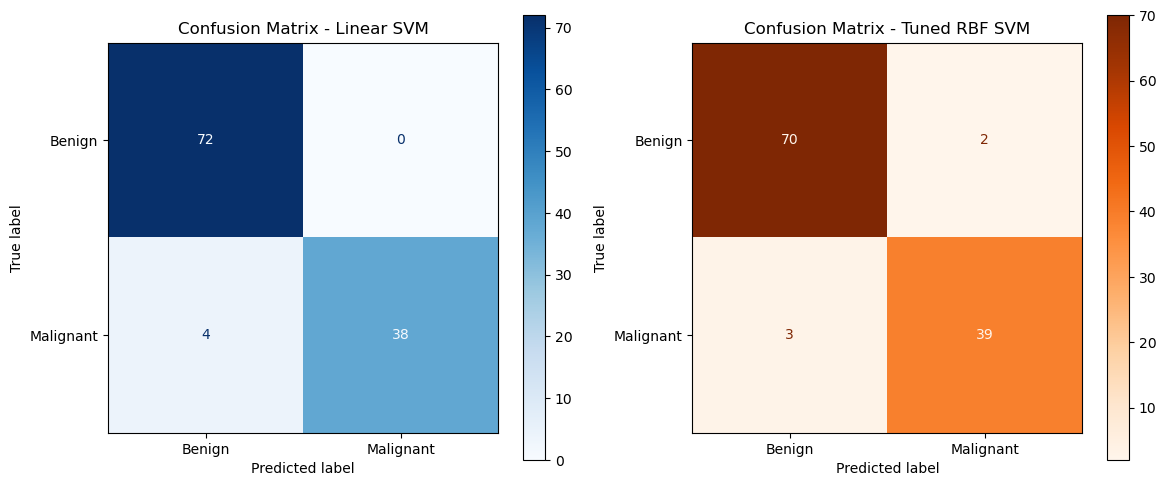

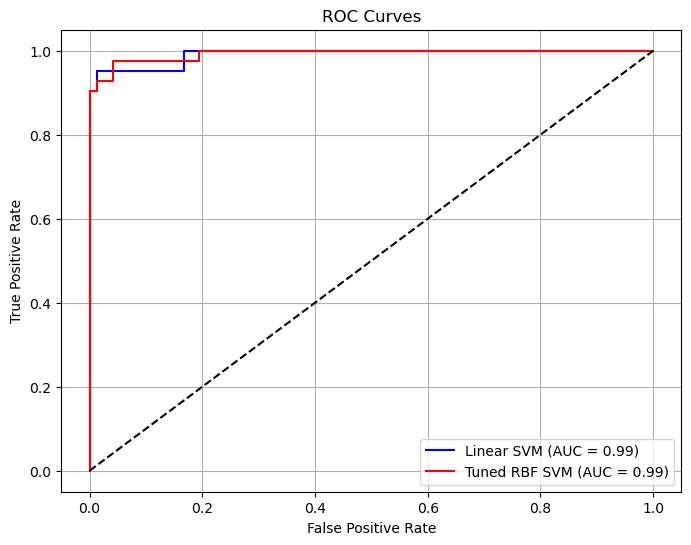

In [22]:
# Prepare classification reports
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
report_rbf = classification_report(y_test, y_pred_best_rbf, output_dict=True)

# Create metrics comparison table
metrics = ['precision', 'recall', 'f1-score', 'support']
classes = ['0', '1']  # Benign=0, Malignant=1
table_data = []

for cls in classes:
    row = [cls]
    for metric in metrics:
        row.append(f"{report_linear[cls][metric]:.2f}")
    for metric in metrics:
        row.append(f"{report_rbf[cls][metric]:.2f}")
    table_data.append(row)

columns = ['Class', 
           'Linear Precision', 'Linear Recall', 'Linear F1-Score', 'Linear Support',
           'RBF Precision', 'RBF Recall', 'RBF F1-Score', 'RBF Support']
df_metrics = pd.DataFrame(table_data, columns=columns)

print("Classification Metrics Comparison:\n")
print(df_metrics)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_best_rbf)

disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=['Benign', 'Malignant'])
disp_linear.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix - Linear SVM')

disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=['Benign', 'Malignant'])
disp_rbf.plot(ax=axes[1], cmap=plt.cm.Oranges)
axes[1].set_title('Confusion Matrix - Tuned RBF SVM')

plt.tight_layout()
plt.show()

# Plot ROC curves
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_prob_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_best_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', label=f'Linear SVM (AUC = {roc_auc_linear:.2f})')
plt.plot(fpr_rbf, tpr_rbf, color='red', label=f'Tuned RBF SVM (AUC = {roc_auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


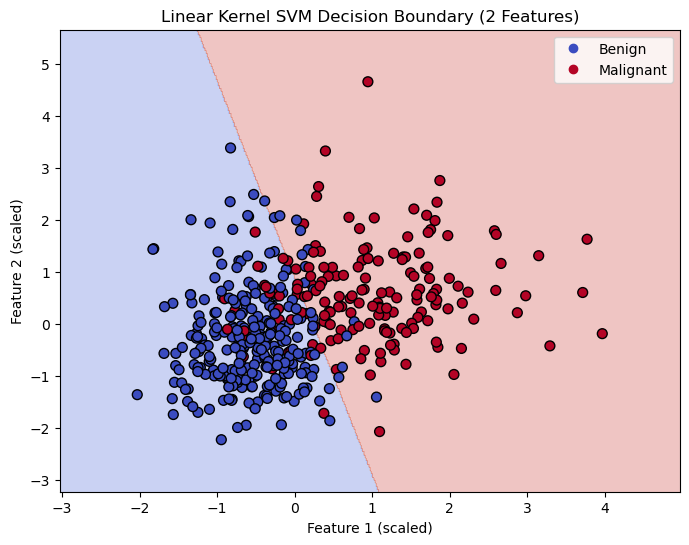

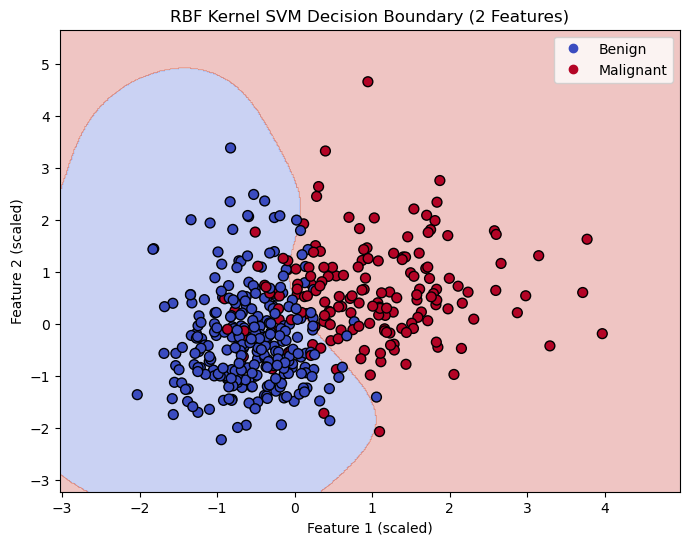

In [23]:
# Select only first two features for visualization
X_2d = X_scaled[:, :2]

# Train-test split on 2D features
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Train Linear SVM on 2D data
svm_linear_2d = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_linear_2d.fit(X_train_2d, y_train_2d)

# Train RBF SVM on 2D data
svm_rbf_2d = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train_2d)

# Function to plot decision boundary
def plot_svm_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(8,6))
    # Create grid to evaluate model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margin
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Benign', 'Malignant'])
    plt.show()

# Plot Linear SVM decision boundary
plot_svm_decision_boundary(svm_linear_2d, X_train_2d, y_train_2d, 'Linear Kernel SVM Decision Boundary (2 Features)')

# Plot RBF SVM decision boundary
plot_svm_decision_boundary(svm_rbf_2d, X_train_2d, y_train_2d, 'RBF Kernel SVM Decision Boundary (2 Features)')


Classification Metrics Comparison:

  Class Linear Precision Linear Recall Linear F1-Score Linear Support  \
0     0             0.95          1.00            0.97          72.00   
1     1             1.00          0.90            0.95          42.00   

  RBF Precision RBF Recall RBF F1-Score RBF Support  
0          0.96       0.97         0.97       72.00  
1          0.95       0.93         0.94       42.00  


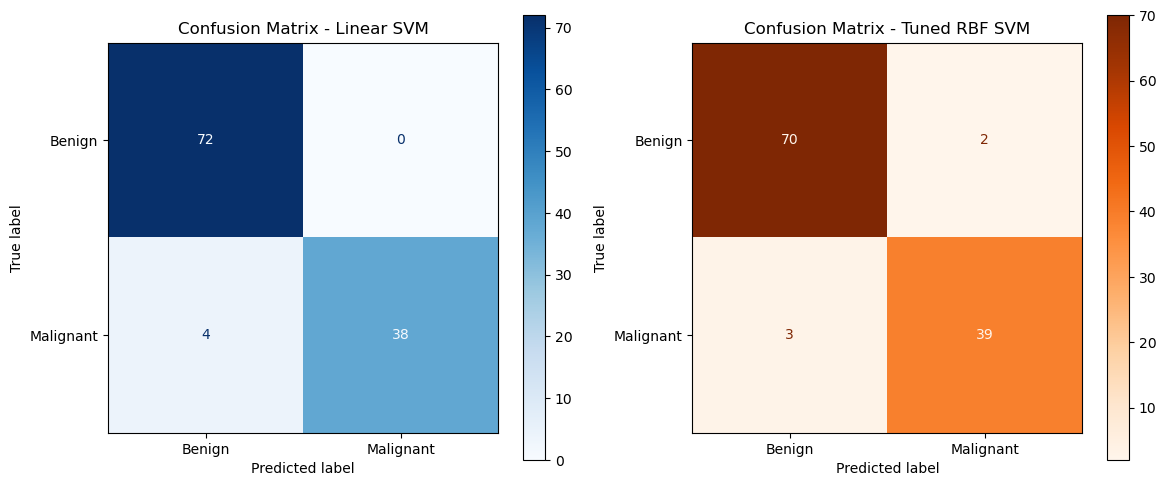

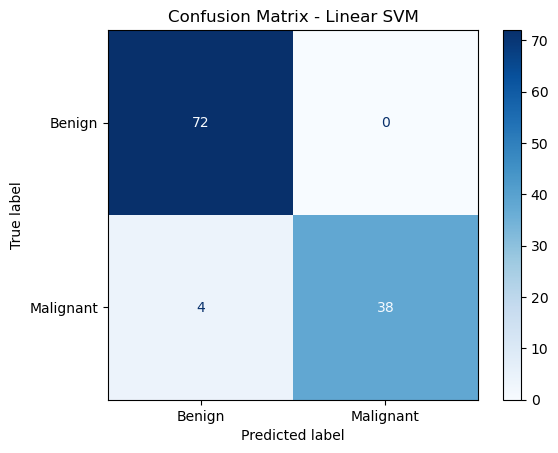

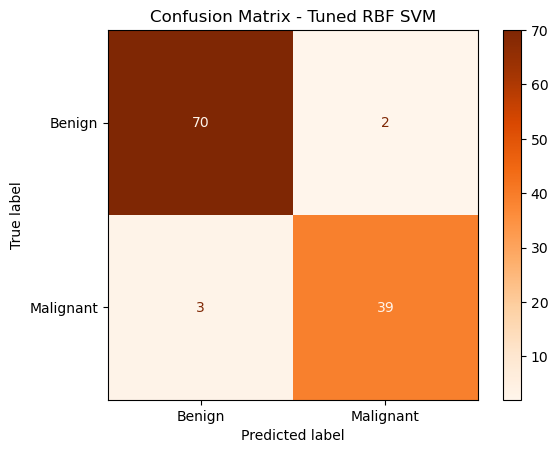

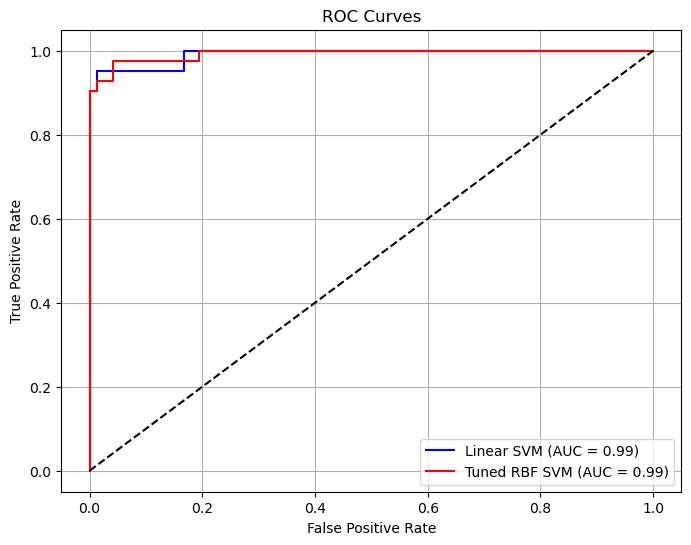

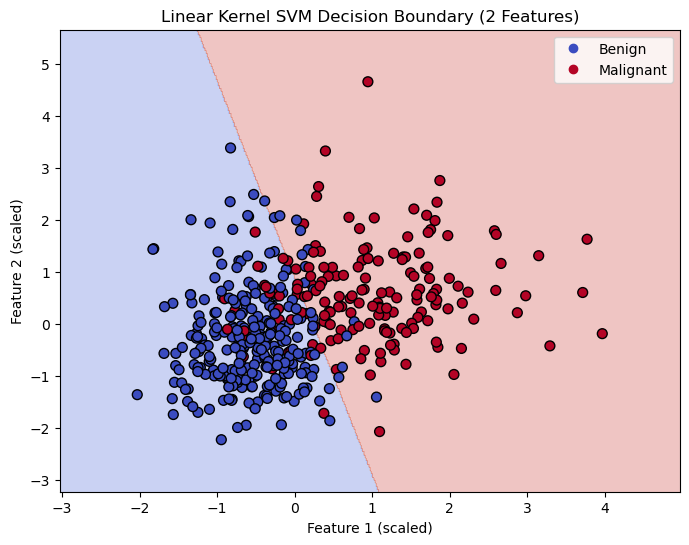

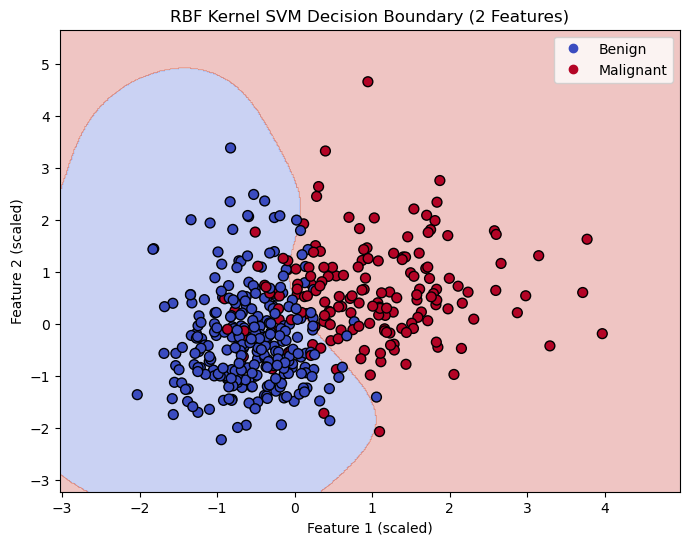

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create 'plots' directory
os.makedirs("plots", exist_ok=True)

# ----- Classification Metrics Comparison -----
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
report_rbf = classification_report(y_test, y_pred_best_rbf, output_dict=True)

metrics = ['precision', 'recall', 'f1-score', 'support']
classes = ['0', '1']  # Benign=0, Malignant=1
table_data = []

for cls in classes:
    row = [cls]
    for metric in metrics:
        row.append(f"{report_linear[cls][metric]:.2f}")
    for metric in metrics:
        row.append(f"{report_rbf[cls][metric]:.2f}")
    table_data.append(row)

columns = ['Class', 
           'Linear Precision', 'Linear Recall', 'Linear F1-Score', 'Linear Support',
           'RBF Precision', 'RBF Recall', 'RBF F1-Score', 'RBF Support']
df_metrics = pd.DataFrame(table_data, columns=columns)

print("Classification Metrics Comparison:\n")
print(df_metrics)

# Optional: Save the comparison table as CSV
df_metrics.to_csv("plots/classification_metrics_comparison.csv", index=False)

# ----- Confusion Matrices -----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_best_rbf)

disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=['Benign', 'Malignant'])
disp_linear.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix - Linear SVM')

disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=['Benign', 'Malignant'])
disp_rbf.plot(ax=axes[1], cmap=plt.cm.Oranges)
axes[1].set_title('Confusion Matrix - Tuned RBF SVM')

plt.tight_layout()
plt.savefig("plots/confusion_matrices.png")
plt.show()

# ----- Individual Confusion Matrices (optional) -----
fig_linear = plt.figure()
ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=['Benign', 'Malignant']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Linear SVM')
plt.savefig("plots/confusion_matrix_linear.png")
plt.close(fig_linear)

fig_rbf = plt.figure()
ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=['Benign', 'Malignant']).plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix - Tuned RBF SVM')
plt.savefig("plots/confusion_matrix_rbf.png")
plt.close(fig_rbf)

# ----- ROC Curves -----
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_prob_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_best_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', label=f'Linear SVM (AUC = {roc_auc_linear:.2f})')
plt.plot(fpr_rbf, tpr_rbf, color='red', label=f'Tuned RBF SVM (AUC = {roc_auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("plots/roc_curves.png")
plt.show()

# ----- Decision Boundary (2 features only) -----
X_2d = X_scaled[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

svm_linear_2d = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_linear_2d.fit(X_train_2d, y_train_2d)

svm_rbf_2d = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train_2d)

def plot_svm_decision_boundary(clf, X, y, title, filename):
    plt.figure(figsize=(8,6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Benign', 'Malignant'])
    plt.savefig(f"plots/{filename}")
    plt.show()

# Plot & Save Decision Boundaries
plot_svm_decision_boundary(svm_linear_2d, X_train_2d, y_train_2d,
                           'Linear Kernel SVM Decision Boundary (2 Features)',
                           'linear_decision_boundary.png')

plot_svm_decision_boundary(svm_rbf_2d, X_train_2d, y_train_2d,
                           'RBF Kernel SVM Decision Boundary (2 Features)',
                           'rbf_decision_boundary.png')



📝 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

C:\Users\VICTUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


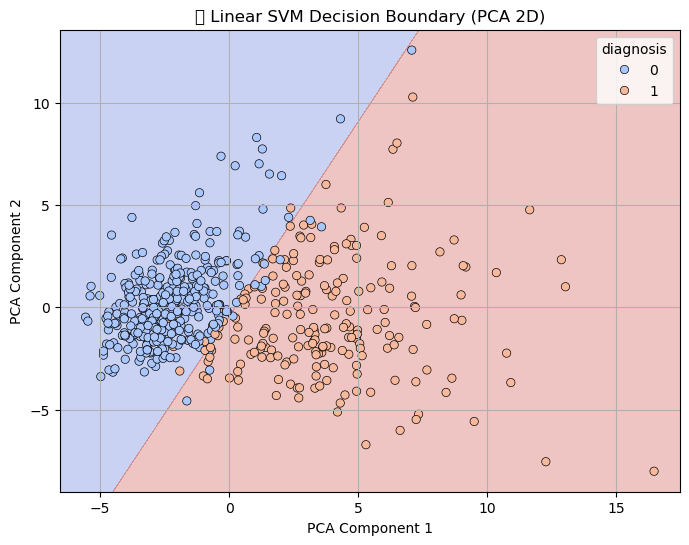

C:\Users\VICTUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


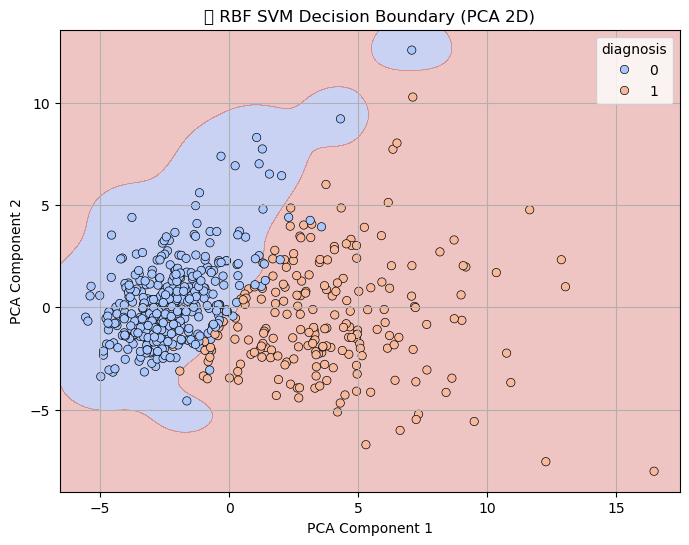


🔍 Best Parameters (GridSearchCV): {'C': 10, 'gamma': 0.01}

📊 Evaluation for Tuned SVM RBF
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[71  0]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


✅ Linear SVM CV Accuracy: [0.9649 0.9825 0.9649 0.9737 0.9823] (Mean: 0.9737)

✅ RBF SVM CV Accuracy: [0.9737 0.9561 1.     0.9649 0.9735] (Mean: 0.9736)

✅ Tuned RBF SVM CV Accuracy: [0.9737 0.9737 0.9825 0.9737 0.9912] (Mean: 0.9789)


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_29524\3263317989.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mean_scores.keys()), y=list(mean_scores.values()), palette='viridis')
C:\Users\VICTUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


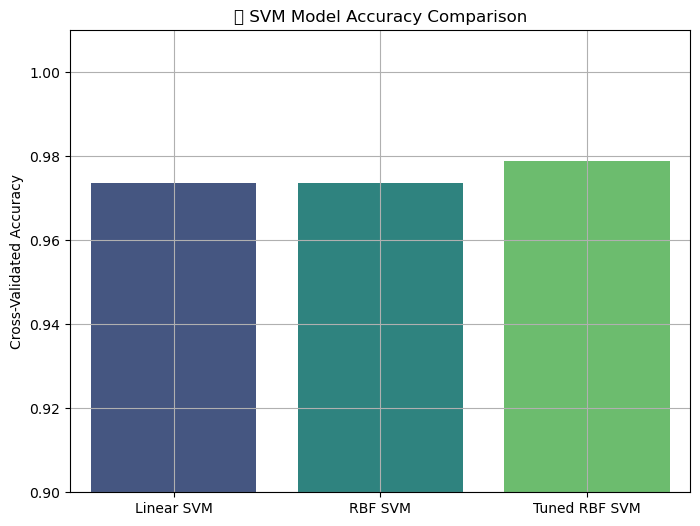

In [1]:
# ✅ Import All Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# ✅ Step 1: Load Dataset
data = pd.read_csv("breast-cancer.csv")  # Ensure file is in the same folder

print("\n📝 Dataset Info:")
print(data.info())

# ✅ Step 2: Preprocess the Data
# Check and drop nulls
data.dropna(axis=1, inplace=True)

# Encode diagnosis: M = 1, B = 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 3: Train Linear and RBF SVMs
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# ✅ Step 4: Evaluate Models
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("SVM Linear", y_test, y_pred_linear)
evaluate_model("SVM RBF", y_test, y_pred_rbf)

# ✅ Step 5: PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Re-train models for 2D visualization
svm_vis_linear = SVC(kernel='linear', C=1)
svm_vis_rbf = SVC(kernel='rbf', C=1, gamma=0.5)

svm_vis_linear.fit(X_train_pca, y_train_pca)
svm_vis_rbf.fit(X_train_pca, y_train_pca)

# ✅ Step 6: Decision Boundary Plot Function
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

plot_decision_boundary(svm_vis_linear, X_pca, y, "🔵 Linear SVM Decision Boundary (PCA 2D)")
plot_decision_boundary(svm_vis_rbf, X_pca, y, "🔴 RBF SVM Decision Boundary (PCA 2D)")

# ✅ Step 7: Hyperparameter Tuning for RBF
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("\n🔍 Best Parameters (GridSearchCV):", grid.best_params_)

# Evaluate best model
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)
evaluate_model("Tuned SVM RBF", y_test, y_best_pred)

# ✅ Step 8: Cross-Validation Score Comparison
models = {
    'Linear SVM': svm_linear,
    'RBF SVM': svm_rbf,
    'Tuned RBF SVM': best_model
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_results[name] = scores
    print(f"\n✅ {name} CV Accuracy: {np.round(scores, 4)} (Mean: {scores.mean():.4f})")

# ✅ Step 9: Compare Accuracy with Bar Plot
mean_scores = {name: scores.mean() for name, scores in cv_results.items()}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(mean_scores.keys()), y=list(mean_scores.values()), palette='viridis')
plt.ylabel("Cross-Validated Accuracy")
plt.title("📊 SVM Model Accuracy Comparison")
plt.ylim(0.90, 1.01)
plt.grid(True)
plt.show()
